_Lambda School Data Science, Unit 2_
 
# Regression 1 Sprint Challenge

Your Sprint Challenge has two parts.

To demonstrate mastery on each part, do all the required, numbered instructions. 

To earn a score of "3" for the part, also do the stretch goals.

## Part 1. Predict avocado sales 🥑

For part 1 of your challenge, you'll use historical data on avocado sales across the nation!

Run this code cell to load the dataset. It has weekly sales volume (total number of avocados sold) from January 4, 2015 through March 25, 2018. The data comes directly from retailers' cash registers based on actual retail sales of Hass avocados in multiple US markets.

In [1]:
import pandas as pd
avocado_url = 'https://drive.google.com/uc?export=download&id=1ljE-LhCA9CCFvSIJYJ1ewX8JmdDpfuhi'
df = pd.read_csv(avocado_url)
assert df.shape == (169, 2)
df.head()

,Date,Total Volume
0,2015-01-04,84674288
1,2015-01-11,78555753
2,2015-01-18,78388735
3,2015-01-25,76466226
4,2015-02-01,119453181


### Required

#### Use the Prophet library to:
1. Fit a model and forecast avocado sales through March 25, 2020
2. Plot the forecast
3. Plot the forecast components
4. Do time series cross-validation, with these parameters: `horizon='90 days', period='45 days', initial='730 days'`
5. Plot the cross-validation Mean Absolute Percentage Error: `metric='mape'`

_For Part 1 of this Sprint Challenge, you are **not** required to calculate or plot baselines, or do train/test split._

You can be confident you've done it correctly when your plots look similar to these:

<img src="https://i.imgur.com/PoyVGp7.png" width="400" align="left">



Fit a model and forecast avocado sales through March 25, 2020

In [2]:
df.head()

,Date,Total Volume
0,2015-01-04,84674288
1,2015-01-11,78555753
2,2015-01-18,78388735
3,2015-01-25,76466226
4,2015-02-01,119453181


In [3]:
#change to datetime
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.head()

,Total Volume
Date,
2015-01-04,84674288
2015-01-11,78555753
2015-01-18,78388735
2015-01-25,76466226
2015-02-01,119453181


In [4]:
df.plot(figsize=(16,9));

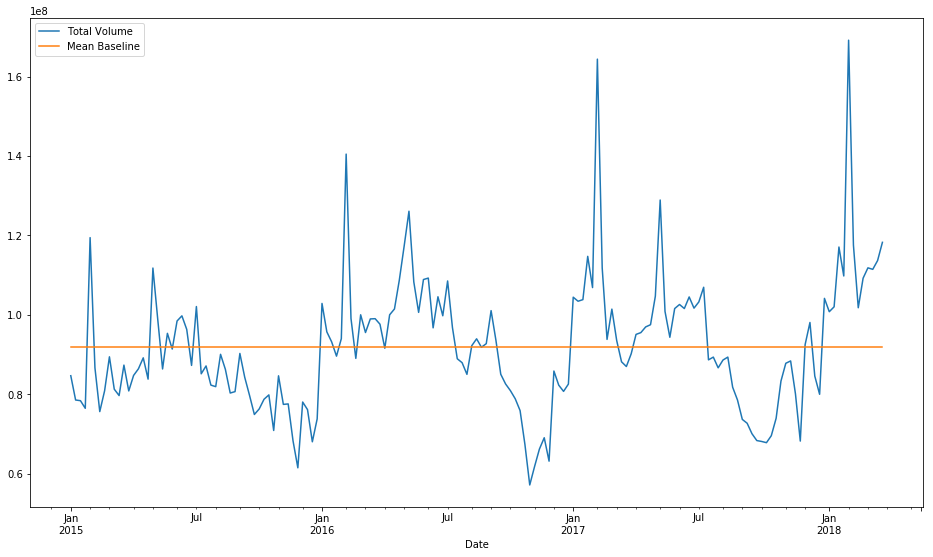

In [5]:
#Establish Mean Baseline. I'll use average method.
df['Mean Baseline'] = df['Total Volume'].mean()
df.plot(figsize=(16,9))

In [6]:
#rename columns ds and y in order to use with prophet
df = df.reset_index().rename(columns={'Date': 'ds', 'Total Volume': 'y'})

In [7]:
df.head()

,ds,y,Mean Baseline
0,2015-01-04,84674288,9.185440e+07
1,2015-01-11,78555753,9.185440e+07
2,2015-01-18,78388735,9.185440e+07
3,2015-01-25,76466226,9.185440e+07
4,2015-02-01,119453181,9.185440e+07


In [8]:
#import prophet library and fit the model to the dataframe
import numpy as np
from fbprophet import Prophet
m = Prophet()
m.fit(df)

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Kevona Jean\myCODE\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [9]:
future=m.make_future_dataframe(periods=731)
future.tail()

,ds
895,2020-03-21
896,2020-03-22
897,2020-03-23
898,2020-03-24
899,2020-03-25


In [10]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
895,2020-03-21,1.073971e+08,1.025993e+08,1.293032e+08,1.053857e+08,1.094114e+08,8.218963e+06,8.218963e+06,8.218963e+06,8.218963e+06,8.218963e+06,8.218963e+06,0.0,0.0,0.0,1.156160e+08
896,2020-03-22,1.074090e+08,1.028520e+08,1.282073e+08,1.053919e+08,1.094281e+08,7.858009e+06,7.858009e+06,7.858009e+06,7.858009e+06,7.858009e+06,7.858009e+06,0.0,0.0,0.0,1.152671e+08
897,2020-03-23,1.074210e+08,1.011948e+08,1.278184e+08,1.054003e+08,1.094449e+08,7.378279e+06,7.378279e+06,7.378279e+06,7.378279e+06,7.378279e+06,7.378279e+06,0.0,0.0,0.0,1.147993e+08
898,2020-03-24,1.074330e+08,1.010897e+08,1.261020e+08,1.054089e+08,1.094618e+08,6.792962e+06,6.792962e+06,6.792962e+06,6.792962e+06,6.792962e+06,6.792962e+06,0.0,0.0,0.0,1.142260e+08
899,2020-03-25,1.074450e+08,1.010407e+08,1.275219e+08,1.054180e+08,1.094787e+08,6.118197e+06,6.118197e+06,6.118197e+06,6.118197e+06,6.118197e+06,6.118197e+06,0.0,0.0,0.0,1.135632e+08


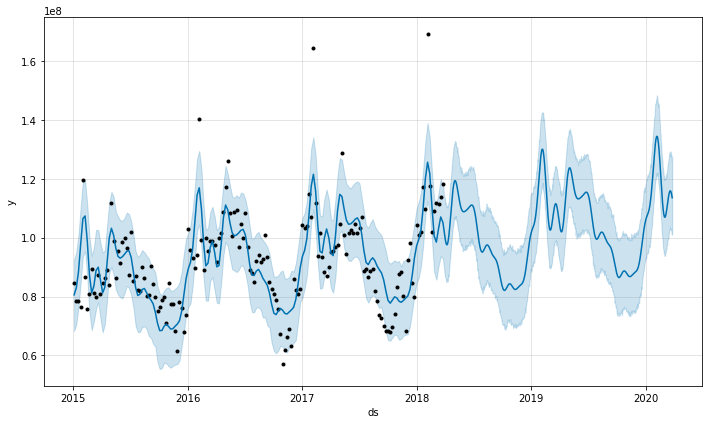

In [11]:
fig1 = m.plot(forecast)

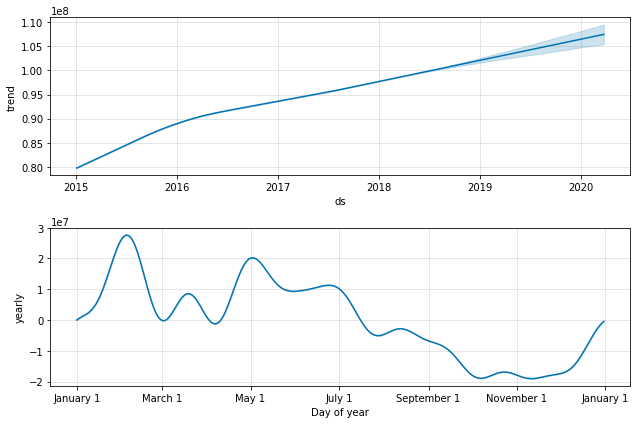

In [12]:
fig2 = m.plot_components(forecast)

Do time series cross-validation, with these parameters: horizon='90 days', period='45 days', initial='730 days'
Plot the cross-validation Mean Absolute Percentage Error: metric='mape'

In [14]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', 
                         horizon='90 days', period='45 days')

INFO:fbprophet:Making 8 forecasts with cutoffs between 2017-02-13 00:00:00 and 2017-12-25 00:00:00
C:\Users\Kevona Jean\myCODE\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [15]:
from fbprophet.diagnostics import performance_metrics
performance_metrics(df_cv).head()

,horizon,mse,rmse,mae,mape,coverage
0,9 days,1.161294e+14,1.077633e+07,9.070125e+06,0.103101,0.5
1,10 days,1.156714e+14,1.075506e+07,8.973781e+06,0.101886,0.5
2,11 days,9.013364e+13,9.493874e+06,7.999991e+06,0.089253,0.6
3,12 days,9.562634e+13,9.778872e+06,8.709881e+06,0.099856,0.6
4,13 days,9.585556e+13,9.790585e+06,8.896907e+06,0.098309,0.6


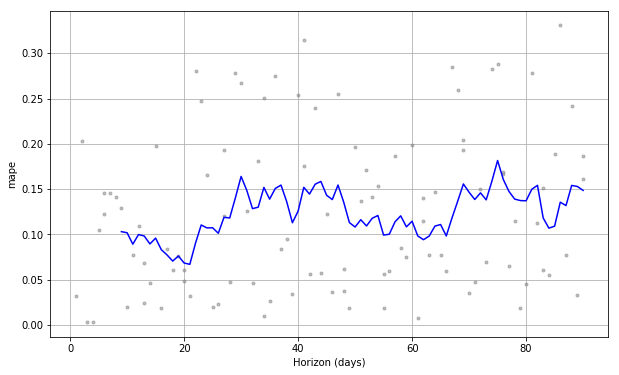

In [16]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

### Stretch Goal
- Adjust your forecasts with Prophet's options for changepoints, holidays, and fourier order. Improve the cross-validation MAPE.

## Part 2. Predict NYC apartment rent 🏠💸

For part 1 of your challenge, you'll use a real-world data with rent prices for a subset of apartments in New York City!

Run this code cell to load the dataset: 

In [17]:
import pandas as pd
rent_url = 'https://drive.google.com/uc?export=download&id=1lVVPmh-WYGb_0Gs_lOv22i02-150qDdZ'
rent = pd.read_csv(rent_url)
assert rent.shape == (48295, 7)

### Required
1. Begin with baselines for regression. Calculate the mean absolute error and $R^2$ score for a mean baseline. _(You can use the whole dataset, or a test set, either way is okay here!)_
2. Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
3. Choose any two features.
4. Use scikit-learn to fit a Linear Regression model on the train data.
5. Apply the model to predict rent prices for the test data.
6. Get regression metrics MAE and $R^2$ for the test data.
7. Get the model's coefficients and intercept.

### Stretch Goals
- Try at least 3 different feature combinations. (You don't have to use two features, you can choose any number of features.)
- Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.

Part 1: Begin with baselines for regression. Calculate the mean absolute error and R2 score for a mean baseline. (You can use the whole dataset, or a test set, either way is okay here!)

In [32]:
from sklearn.linear_model import LinearRegression
rent.head()

,year,month,bedrooms,bathrooms,latitude,longitude,price,Mean Baseline,Error,Absolute Error
0,2016,6,3,1.5,40.7145,-73.9425,3000,3438.052034,438.052034,438.052034
1,2016,6,2,1.0,40.7947,-73.9667,5465,3438.052034,-2026.947966,2026.947966
2,2016,4,1,1.0,40.7388,-74.0018,2850,3438.052034,588.052034,588.052034
3,2016,4,1,1.0,40.7539,-73.9677,3275,3438.052034,163.052034,163.052034
4,2016,4,4,1.0,40.8241,-73.9493,3350,3438.052034,88.052034,88.052034


In [37]:
target='price'
rent['Mean Baseline'] = rent[target].mean()
error = rent['Mean Baseline'] - rent[target]
rent['Absolute Error'] = error.abs()

rent.describe()

,year,month,bedrooms,bathrooms,latitude,longitude,price,Mean Baseline,Error,Absolute Error
count,48295.0,48295.000000,48295.000000,48295.000000,48295.000000,48295.000000,48295.000000,4.829500e+04,4.829500e+04,48295.000000
mean,2016.0,5.014950,1.508417,1.177927,40.750784,-73.972366,3438.052034,3.438052e+03,4.531391e-12,1055.785777
std,0.0,0.824537,1.091198,0.423621,0.039555,0.029563,1401.003716,3.129149e-09,1.401004e+03,920.926015
min,2016.0,4.000000,0.000000,0.000000,40.571200,-74.094000,1025.000000,3.438052e+03,-6.560948e+03,0.052034
25%,2016.0,4.000000,1.000000,1.000000,40.728100,-73.991700,2495.000000,3.438052e+03,-5.619480e+02,438.052034
50%,2016.0,5.000000,1.000000,1.000000,40.751600,-73.977900,3100.000000,3.438052e+03,3.380520e+02,861.947966
75%,2016.0,6.000000,2.000000,1.000000,40.774000,-73.954700,4000.000000,3.438052e+03,9.430520e+02,1438.052034
max,2016.0,6.000000,6.000000,4.000000,40.915400,-73.700100,9999.000000,3.438052e+03,2.413052e+03,6560.947966


In [22]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true=rent['price'], 
                    y_pred=rent['Mean Baseline'])

1055.7857771080928

In [29]:
from sklearn.metrics import r2_score
r2_score(y_true=rent['price'], 
         y_pred=rent['Mean Baseline'])

0.0

Part 2. Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.

In [33]:
features = ['bedrooms', 'bathrooms']
target = 'price'

X=rent[features]
y= rent[target]

In [39]:
train = rent.query('month <=5')
test = rent.query('month > 5')
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((31512, 2), (31512,), (16783, 2), (16783,))

Part3-4.Choose any two features.
Use scikit-learn to fit a Linear Regression model on the train data.

In [40]:
model=LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Part 5. Apply the model to predict rent prices for the test data.

In [42]:
y_pred = model.predict(X)

Part 6. Get regression metrics MAE and R2 for the test data.


In [43]:
mean_absolute_error(y, y_pred)

743.7790226813779

In [44]:
r2_score(y, y_pred)

0.47485657310145557

Part 7. Get the model's coefficients and intercept.

In [45]:
model.coef_, model.intercept_

(array([ 413.80713679, 1545.63477548]), 993.2128747222005)